# Operators and Dunder Methods
Exploring how Python's dunder (double underscore) methods work with pandas

In [3]:
import sys
import os

import pandas as pd
import numpy as np
import pyarrow as pa
sys.path.append(os.path.abspath(".."))

from extras.utils import load_vehicle_data

## Loading Data from Ch. 7

In [4]:
df = load_vehicle_data()

In [6]:
# Generating Series
city_mpg = df.city08
highway_mpg = df.highway08

## Some Dunder methods

In [3]:
print("2 + 4: ", 2 + 4)
print("Is really doing")
print("(2).__add__(4):", (2).__add__(4))

2 + 4:  6
Is really doing
(2).__add__(4): 6


A Series object also has the .\_\_add__ method, so it can also be called with +. There's also a .\_\_div__ method supporting division. So for example, average between two series can be calculated as:

In [8]:
(city_mpg + highway_mpg)/2

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: double[pyarrow]

## Index alignment

It is important to ensure that there exists index alignment, as pandas will match the index of each Series that's being added up, pairing it with every entry with the same name. Because of this it's important to make sure that indexes:
1. Are unique
2. Are common between the Series

In [9]:
s1 = pd.Series([10, 20, 30], index=[1,2,2])
s2 = pd.Series([35, 44, 53], index=[2,2,4], name='s2')

In [10]:
s1

1    10
2    20
2    30
dtype: int64

In [11]:
s2

2    35
2    44
4    53
Name: s2, dtype: int64

In [12]:
s1 + s2

1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64

Here index 1 and 4 return NaN as they are not present in one of the Series, while index 2 return 4 results, as every 2 from s1 is matched with every 2 from s2

## Broadcasting

In [13]:
s2 + 5

2    40
2    49
4    58
Name: s2, dtype: int64

Doing the operation with a scalar, pandas __broadcasts__ the operation to all values.

In [14]:
s1.add(s2, fill_value=0)

1    10.0
2    55.0
2    64.0
2    65.0
2    74.0
4    53.0
dtype: float64

This is a benefit of the .add function, which allows to give a fill value. So the value that is present in one side gets added with the fill value (in the above case 0)

## Iteration

There is also an .\_\_iter__ method which loops over the items of a series, BUT this defeats the purpose of using pandas as is not recommended.

In [15]:
s1.__iter__

<bound method IndexOpsMixin.__iter__ of 1    10
2    20
2    30
dtype: int64>

## Operator Methods

The benefits of "going under the hood" with these methods is controlling some parameters, such as the fill_value previously shown

In [16]:
s1 + s2

1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64

In [17]:
s1.add(s2)

1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64

In [18]:
s1.add(s2, fill_value=0)

1    10.0
2    55.0
2    64.0
2    65.0
2    74.0
4    53.0
dtype: float64

## Chaining

Another benefit of methods over operators is that it makes chaining easier. With operators it can be than too, but adding parenthesis between operators.

In [19]:
# With operators it needs a parenthesis to follow the mathematical logic
(city_mpg + highway_mpg) / 2

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: double[pyarrow]

In [20]:
# With methods it just follows the order, making it cleaner
(
    city_mpg
    .add(highway_mpg)
    .div(2)
)

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: double[pyarrow]

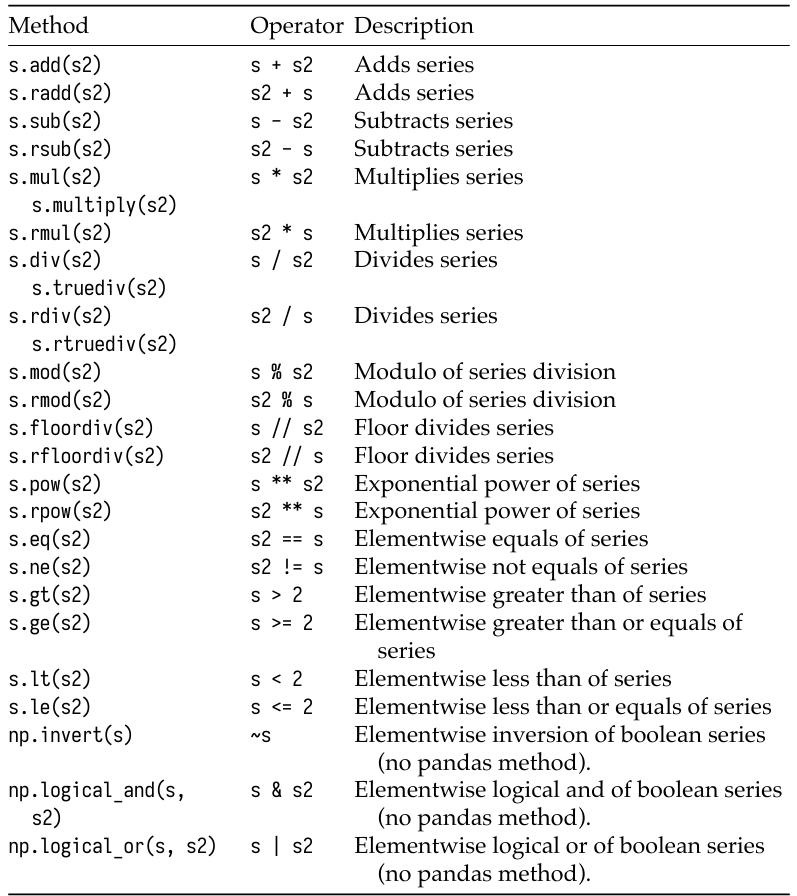

## Excercises

In [21]:
# 1. Add a numeric series to itself.
s1 + s1

1    20
2    40
2    60
dtype: int64

In [22]:
# 2. Add 10 to a numeric series.
s1 + 10

1    20
2    30
2    40
dtype: int64

In [24]:
# 3. Use the .add method to add a numeric series.
s1.add(s2, fill_value=0)

1    10.0
2    55.0
2    64.0
2    65.0
2    74.0
4    53.0
dtype: float64

In [25]:
# 4. Read the documentation for the .add method
help(s1.add)

Help on method add in module pandas.core.series:

add(other, level=None, fill_value=None, axis: 'Axis' = 0) -> 'Series' method of pandas.core.series.Series instance
    Return Addition of series and other, element-wise (binary operator `add`).
    
    Equivalent to ``series + other``, but with support to substitute a fill_value for
    missing data in either one of the inputs.
    
    Parameters
    ----------
    other : Series or scalar value
    level : int or name
        Broadcast across a level, matching Index values on the
        passed MultiIndex level.
    fill_value : None or float value, default None (NaN)
        Fill existing missing (NaN) values, and any new element needed for
        successful Series alignment, with this value before computation.
        If data in both corresponding Series locations is missing
        the result of filling (at that location) will be missing.
    axis : {0 or 'index'}
        Unused. Parameter needed for compatibility with DataFrame.